In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Definição da amostra

In [43]:
popu = pd.read_csv("Popu_series.csv")
popu = popu.sample(frac=0.3, replace=False, random_state=195)
len(popu)

97

In [44]:
popu = popu['serie']
popu

146                            The Chosen One
95                                    Osmosis
173                                  Puerta 7
106                           Holiday Secrets
204                                Mindhunter
                        ...                  
28                              Sex Education
230                          The English Game
85                            Paava Kadhaigal
233                                  Homemade
264    Trailer Park Boys Out of the Park: USA
Name: serie, Length: 97, dtype: object

In [45]:
popu.to_csv("Amostra.csv", index=False)

# Análise Exploratória

In [46]:
#imdb = pd.read_csv("imdb_series.csv") REMOVER (arquivo da amostra antiga)
imdb = pd.read_csv("Amostra_IMDB.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")
reviews = pd.read_csv("UserReviewsCritic.csv", sep=";")

In [47]:
reviews.head()

,Titulo,user_reviews,critic_reviews
0,The Chosen One,27,5
1,Osmosis,50,10
2,Puerta 7,14,4
3,Holiday Secrets,7,5
4,Mindhunter,867,115


In [48]:
twitter.dropna(inplace=True)

In [49]:
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,9048368
1,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,7043380
2,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,9170386
3,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,11243536
4,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,5290382
...,...,...,...,...,...,...,...
92,Sex Education,2019-01-11,2204.0,13414.0,44564.0,60182.0,7767422
93,The English Game,2020-03-20,0.0,1.0,5.0,6.0,8403664
94,Paava Kadhaigal,2020-12-18,366.0,577.0,325.0,1268.0,13206988
95,Homemade,2020-06-30,142.0,180.0,232.0,554.0,12574336


In [50]:
imdb.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,Data de estréia,Roteiristas,Censura,País,Idiomas,Episodios
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,2019-06-28,"Pablo Cruz, Raphael Draccon, Raphael Draccon","Argentina:16, Brazil:16, Germany:16::(self-app...",Brazil,Portuguese,6.0
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,2019-03-29,"Gabriel Chiche, Louis Chiche, William Chiche","Brazil:16::(self-applied), France:13::(self-ap...",France,French,8.0
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,2020-02-21,"Patricio Vega, Martin Zimmerman, Martin Zimmerman","Argentina:18, Australia:M, Philippines:18+::(s...",Argentina,Spanish,8.0
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,2019-11-20,Katharina Eyssen,"Argentina:13, Singapore:PG13",Germany,German,3.0
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,2017-10-13,"John Douglas, Mark Olshaker, Joe Penhall","Argentina:16, Australia:MA15+::(Netflix self-r...",United States,English,10.0


In [51]:
reviews.rename(columns={"titulo":"Titulo"}, inplace=True)
aux = pd.merge(imdb, twitter, on = "IMDBid")
dados = pd.merge(aux, reviews, on = "Titulo")

#dados.drop(dados[dados["Nome"]=="LoveDeathandRobots"].index, inplace=True)
dados.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,...,Portuguese,6.0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,27,5
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,...,French,8.0,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,50,10
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,...,Spanish,8.0,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,14,4
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,...,German,3.0,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,7,5
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,...,English,10.0,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,867,115


In [52]:
dados.drop(columns="Reviews", inplace=True)

In [53]:
indice = dados[dados['Duração']>100]['Duração'].index

In [54]:
dados.loc[indice, "Duração"] = dados.loc[indice, "Duração"]/dados.loc[indice, "Episodios"]

In [55]:
dados[dados['Duração']>100]

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews


In [56]:
dados['DataEstreia'] = pd.to_datetime(dados['Data de estréia'], format="%Y-%m-%d", errors = 'coerce')
dados['mes'] = pd.DatetimeIndex(dados['Data de estréia']).month

LEMBRAR DE DIVIDIR O ENGAJAMENTO POR NUMERO DE DIAS!!

In [57]:
#dados['CountPre']/qtddiaspre
# Pre = 
# Durante = 
# Pos = 

NameError: name 'qtddiaspre' is not defined

# Análise Exploratória

In [ ]:
teste = dados[dados['Duração'].notna()]

In [ ]:
#dados.apply(lambda linha: linha['Duração'] if linha['Duração']<100 else linha['Duração']/linha['Episodios'])
#dados.apply(lambda linha: print(linha[7]))
#a = teste.apply(lambda linha: print(linha[0]))
#dados['Duração']

#duracao = dados['Duração']
#epi = dados['Episodios']


## Nota

In [ ]:
nota1 = sns.histplot(data=dados, x="Nota")

nota1.set_title('Histograma das notas no IMDb')
nota1.set_ylabel('Frequência')

In [ ]:
nota2 = sns.boxplot(y=dados['Nota'], data=dados)

nota2.set_title('Boxplot das notas no IMDb')
nota2.set_ylabel('Nota')

In [ ]:
nota3 = sns.boxplot(x=dados['Ano'],y=dados['Nota'], data=dados)

nota3.set_title('Boxplot das notas no IMDb por ano de lançamento')

In [ ]:
y = []
coluna = []
for i in range (24,dados.columns.size,1):
    coluna.append(str(dados.columns[i]))
    
    aux = []
    for j in range (0, len(dados[dados[coluna[-1]] == 1]['Nota']),1):
        aux.append(dados[dados[coluna[-1]] == 1]['Nota'].values[j])
        
    y.append(aux)

In [ ]:
colunas = {'Nota':[], 'Gênero':[]}
df_aux = pd.DataFrame(colunas)

for i in range(len(y)):
    for val in y[i]:
        linha = {'Nota':val, 'Gênero':coluna[i]}
        df_aux = df_aux.append(linha, ignore_index=True)

In [ ]:
df_aux ## PQ TA DANDO ERRO?

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Nota', data=df_aux)
ax.tick_params(rotation=90)

#fig, ax = plt.subplots()
#sns.barplot(x = x, y = df['log_disaster'], palette="Blues_d")
#ax.tick_params(rotation=90)
#ax.set_title('Número de Desastres por Ano')
##ax.set_ylabel('Número de Desastres')
#ax.set_xlabel('Ano')
#fig.set_size_inches(20, 5)

In [ ]:
#["Mystery" in linha for linha in dados['Gênero']]
#plt.boxplot(dados[dados['Mystery']==1]['Nota'].describe())#.plot()
#plt.boxplot(dados[dados['Drama']==1]['Nota'].describe())#.plot()
#dados[dados['Drama']==1]['Nota'].describe()#.plot()

In [ ]:
#dados[dados['Drama']==1]['Nota'].count()

In [ ]:
#type(dados['Gênero'].apply(lambda x: x)[0])

In [ ]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
#dados['Gênero']


In [ ]:
dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

In [ ]:
len(dados)

In [ ]:
dados = dados.join(dummies)


In [ ]:
dados.head()

In [ ]:
#dados[colunas = 25:45].equals(dummies)

In [ ]:
dados.iloc[:, 24:].sum()
dados.iloc[:, 24:].sum()*100/86

In [ ]:
dados.columns

In [ ]:
dados.columns[24]

### Nota do IMDB e número de votos por engajamento por engajamento

In [ ]:
#dados['Nota'] CountPre CountDurante CountPos CountTotal

sns.scatterplot(data=dados[dados['Nota']>4], x="Nota", y="CountTotal")
#sns.regplot(data=dados[dados['Nota']>4], x="Nota", y="CountTotal")

#nota1.set_title('Histograma das notas no IMDb')
#nota1.set_ylabel('Frequência')

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountTotal")#, hue=dados['País'])

In [ ]:
sns.boxplot(data=dados, x="Nota", y="País")#, hue=dados['País'])

In [ ]:
sns.boxplot(data=dados, x="Episodios", y="Nota")

In [ ]:
sns.boxplot(data=dados, x="Check", y="Nota")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountPre")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountDurante")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountPos")

In [ ]:
dados.corr(method='pearson')
#dados.corr(method='spearman')

In [ ]:
dados.corr(method='spearman')

In [ ]:
sns.scatterplot(data=dados, x="Ano", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Ano", y="Votos")

In [ ]:
dados[dados['Ano']==2013]

In [ ]:
sns.scatterplot(data=dados, x="Votos", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="Votos")

## Votos

In [ ]:
# 120000 - 20000 - 2500
votos1 = sns.histplot(data=dados, x="Votos")#, log_scale=True)

votos1.set_title('Histograma da quantidade de votos no IMDb')
votos1.set_ylabel('Frequência')

In [ ]:
votos2 = sns.histplot(data=dados[dados['Votos']<100000], x="Votos")#, log_scale=True)

votos2.set_title('Histograma da quantidade de votos no IMDb (<100.000)')
votos2.set_ylabel('Frequência')

In [ ]:
votos3 = sns.scatterplot(data=dados, x="Nota", y="Votos")
#sns.regplot(data=dados[dados['Nota']>4], x="Nota", y="Votos")

votos3.set_title('Diagrama de dispersão da nota e quantidade de votos no IMDb')


In [ ]:
votos4 = sns.boxplot(data=dados, x="Ano", y="Votos")
votos4.set_title('Boxplot da quantidade de votos no IMDb por ano de lançamento')

In [ ]:
votos5 = sns.boxplot(data=dados, x="Votos", y="País")
votos5.set_title('Boxplot da quantidade de votos por país de origem')

In [ ]:
maiorespaises = dados[ (dados['País']=="United States") | (dados['País']=="Brazil") | (dados['País']=="South Korea") | (dados['País']=="United Kingdom") | (dados['País']=="Germany") | (dados['País']=="India")]
votos5 = sns.boxplot(data=maiorespaises, x="Votos", y="País")
votos5.set_title('Boxplot da quantidade de votos por país de origem (mais populares)')

In [ ]:
votos6 = sns.boxplot(data=dados, x="Episodios", y="Votos")
votos6.set_title('Boxplot da quantidade de votos por número de episódios')

In [ ]:
#sns.scatterplot(data=dados, x="user_reviews", y="Votos")
votos7 = sns.regplot(data=dados, x="user_reviews", y="Votos")
votos7.set_title('Diagrama de dispersão da quantidade de votos por quantidade de reviews dos usuários do IMDb')
votos7.set_xlabel('Reviews dos usuários do IMDb')

In [ ]:
#sns.scatterplot(data=dados, x="critic_reviews", y="Votos")
votos8 = sns.regplot(data=dados, x="critic_reviews", y="Votos")
votos8.set_title('Diagrama de dispersão da quantidade de votos por quantidade de reviews dos críticos do IMDb')
votos8.set_xlabel('Reviews dos críticos do IMDb')

# Duração

In [ ]:
dura1 = sns.histplot(data=dados, x="Duração")
dura1.set_title('Histograma da duração média dos episódios por série')
dura1.set_xlabel('Frequência')

In [ ]:
dura2=sns.boxplot(data=dados, x="Duração")
dura2.set_title('Boxplot da duração média dos episódios por série')

In [ ]:
sns.scatterplot(data=dados, x="Duração", y="Votos")

In [ ]:
dura3=sns.boxplot(data=dados, x="Ano", y="Duração")
dura3.set_title('Boxplot da duração média de episódios por ano de lançamento da série')

In [ ]:
dura4=sns.boxplot(data=dados, x="Check", y="Duração")
dura4.set_title('Boxplot da duração média de episódios por tipo de série')
dura4.set_xlabel('Tipo de série')

# Ano

In [ ]:
ano1 = sns.countplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)
ano1.set_title('Gráfico de barras do ano de lançamento das séries')
ano1.set_xlabel('Frequência')

In [ ]:
sns.boxplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)

# Data de estréia

Text(0, 0.5, 'Frequência')

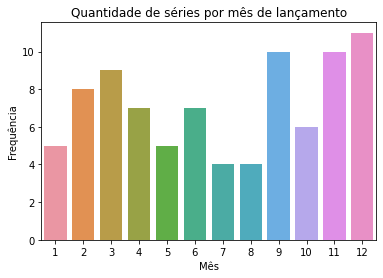

In [62]:
mes1 = sns.countplot(data=dados, x="mes")
mes1.set_title('Quantidade de séries por mês de lançamento')
mes1.set_xlabel('Mês')
mes1.set_ylabel('Frequência')

# País

In [ ]:
dados['País'].value_counts()

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=dados, x="País")
ax.tick_params(rotation=90)


# Idiomas

In [58]:
dados['Idiomas'].value_counts()

English                                              42
Spanish                                               7
Portuguese                                            5
German                                                4
Korean                                                4
Hindi                                                 3
French                                                2
English, Japanese                                     1
German, English                                       1
Tamil                                                 1
Italian                                               1
Arabic, Turkish, English                              1
English, Italian, Spanish                             1
Mandarin, English                                     1
Turkish, Arabic, Kurdish                              1
Arabic                                                1
French, English                                       1
Turkish                                         

<AxesSubplot:xlabel='Idiomas', ylabel='count'>

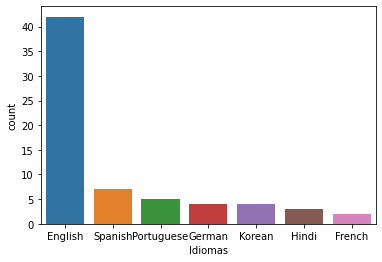

In [59]:
sns.countplot(data=dados, x="Idiomas", order=dados.Idiomas.value_counts().iloc[:7].index)

#visCausaMorte = sns.countplot(x="CAUSABAS", order=dados.CAUSABAS.value_counts().iloc[:10].index, data=dados, palette="Set1")

# Episodios

In [ ]:
sns.histplot(data=dados, x="Episodios")# tratar (dividir duracao por numero de episodios para >100)

In [ ]:
sns.boxplot(data=dados, x="Check", y="Episodios")

## Reviews de usuários

In [ ]:
sns.histplot(data=dados, x="user_reviews")

In [ ]:
sns.boxplot(data=dados, x = "Ano",y="user_reviews")

## Reviews de críticos

In [ ]:
sns.histplot(data=dados, x="critic_reviews")

In [ ]:
sns.boxplot(data=dados, x = "Ano",y="critic_reviews")

# Engajamento (counts)

In [ ]:
sns.histplot(data=dados, x="CountTotal")

In [ ]:
sns.histplot(data=dados, x="CountPre")


In [ ]:
sns.histplot(data=dados, x="CountDurante")


In [ ]:
sns.histplot(data=dados, x="CountPos")
dados[dados.CountPos>100000]


In [ ]:
boxplot_ano_countTotal = sns.boxplot(data=dados, x="Ano", y="CountTotal")
boxplot_ano_countTotal.set(xlabel='Ano', ylabel='Número tweets', title='Total de Tweets')
# sns.boxplot(data=dados, x="Ano", y="CountPre")
# sns.boxplot(data=dados, x="Ano", y="CountDurante")
# sns.boxplot(data=dados, x="Ano", y="CountPos")

In [ ]:
dados[(dados.CountTotal>80000) & (dados.Ano == 2020) ]

Aparentemente, a utilização do Twitter para comentar séries vem diminuindo ao longo dos anos com exceção de algumas séries:
- Bridgeton (esperado já que foi uma das séries mais assistida da Netflix de todos os anos)
- Julie and Phantoms (essa série parece estar errada de alguma forma -> ela não é famosa mas tem muito tweets)???

In [ ]:
def getCount(tipocount):
    y = []
    coluna = []
    for i in range (24,dados.columns.size,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {'Count':[], 'Gênero':[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {'Count':val, 'Gênero':coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

dfTotal = getCount("CountTotal")



In [ ]:
dfTotal

In [ ]:
fig, ax = plt.subplots()
boxplot_genero_countTotal = sns.boxplot(x='Gênero',y='Count', data=dfTotal)
boxplot_genero_countTotal = 
ax.tick_params(axis='x', rotation=90)

In [ ]:
dfPre = getCount("CountPre")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfPre)
ax.tick_params(rotation=90)

In [ ]:
dfDurante = getCount("CountDurante")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfDurante)
ax.tick_params(rotation=90)

In [ ]:
dfPos = getCount("CountPos")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfPos)
ax.tick_params(rotation=90)

In [ ]:
sns.boxplot(data=dados, x="mes", y="CountTotal")

In [ ]:
sns.boxplot(data=dados, x="mes", y="CountPre")

In [ ]:
sns.boxplot(data=dados, x="mes", y="CountDurante")


In [ ]:
sns.boxplot(data=dados, x="mes", y="CountPos")

In [ ]:
sns.boxplot(data=dados, x="Check", y="CountTotal")

In [ ]:
sns.boxplot(data=dados, x="Episodios", y="CountTotal")

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=dados, x="País", y="CountTotal")
ax.tick_params(rotation=90)

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=dados, x="Idiomas", y="CountTotal")
ax.tick_params(rotation=90)

# Série Temporal do engajamento

### Número e duração de episódios por engajamento

In [ ]:
sns.boxplot(data=dados, x="Episodios", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Duração", y="CountTotal")

In [ ]:
dados[dados['Duração']>100] #corrigir, pegar a media por episodio (duracao/episodios)

## Atores e engajamento

## Influência de engajamento anterior no posterior

In [ ]:
sns.scatterplot(data=dados, x="CountPre", y="CountDurante")

In [ ]:
sns.scatterplot(data=dados, x="CountDurante", y="CountPos")

## Engajamento e genêro

In [ ]:
# dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
# dados['Gênero']

In [ ]:
# pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# # Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

## Censura e engajamento

## Reviews e engajamento